## COVID19 Data Analysis

### Imports

In [1]:
import json
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.style.use('seaborn')
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

%matplotlib inline

### Raw Patient Wise Data

In [2]:
df = pd.read_csv("Data\\raw_data.csv")

unwanted_columns = [
    'State Patient Number',
    'Estimated Onset Date',
    'Detected City',
    'State code',
    'Notes',
    'Contracted from which Patient (Suspected)',
    'Source_1',
    'Source_2',
    'Source_3',
    'Backup Notes',
]

df.drop(unwanted_columns, axis=1, inplace=True)

df['Date Announced'] = pd.to_datetime(df['Date Announced'], infer_datetime_format=True)
df['Status Change Date'] = pd.to_datetime(df['Status Change Date'], infer_datetime_format=True)
df['Age Bracket'] = pd.to_numeric(df['Age Bracket'], errors='coerce')

df.head()

,Patient Number,Date Announced,Age Bracket,Gender,Detected District,Detected State,Current Status,Nationality,Type of transmission,Status Change Date
0,1,2020-01-30,20.0,F,Thrissur,Kerala,Recovered,India,Imported,2020-02-14
1,2,2020-02-02,NaN,NaN,Alappuzha,Kerala,Recovered,India,Imported,2020-02-14
2,3,2020-02-03,NaN,NaN,Kasaragod,Kerala,Recovered,India,Imported,2020-02-14
3,4,2020-03-02,45.0,M,East Delhi,Delhi,Recovered,India,Imported,2020-03-15
4,5,2020-03-02,24.0,M,Hyderabad,Telangana,Recovered,India,Imported,2020-03-02


### Age Graphs

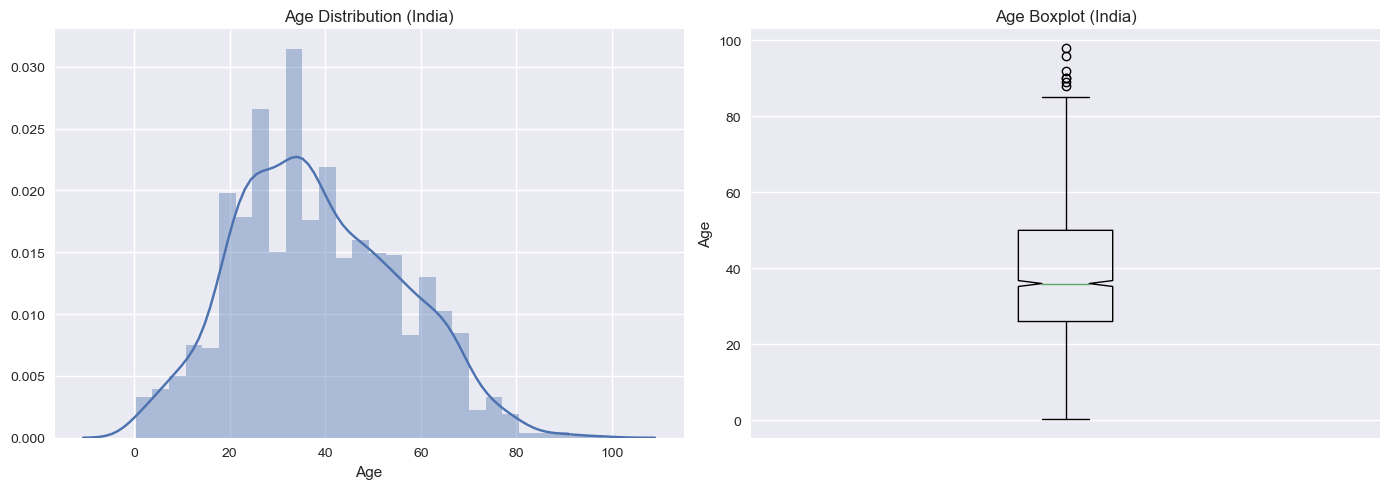

In [3]:
fig = plt.figure(figsize=(14, 5), dpi=100)

plt.subplot(121)
sns.distplot(df['Age Bracket'].dropna(), kde=True)
plt.title('Age Distribution (India)')
plt.xlabel('Age')

plt.subplot(122)
plt.boxplot(df['Age Bracket'].dropna(), notch=True)
plt.title('Age Boxplot (India)')
plt.xticks([0])
plt.ylabel('Age')
plt.savefig('data_insight\\age_distribution.png')
plt.show()

### State Wise Analysis

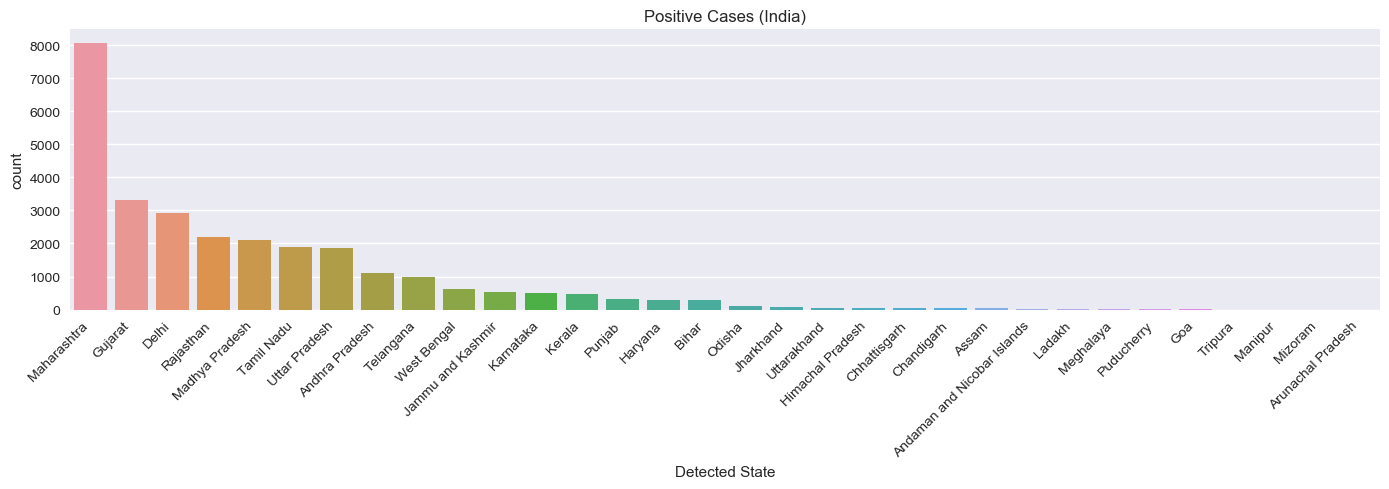

In [4]:
plt.figure(figsize=(14, 5), dpi=100)

statewise_count = sns.countplot(data=df, x=df['Detected State'], order=df['Detected State'].value_counts().index)
statewise_count.set_title('Positive Cases (India)')

statewise_count.set_xticklabels(statewise_count.get_xticklabels(),
                                rotation=45,
                                horizontalalignment='right',
                                fontweight='light')
plt.savefig('data_insight\\cases_statewise.png')
plt.show()

### City Wise Analysis in Tamil Nadu

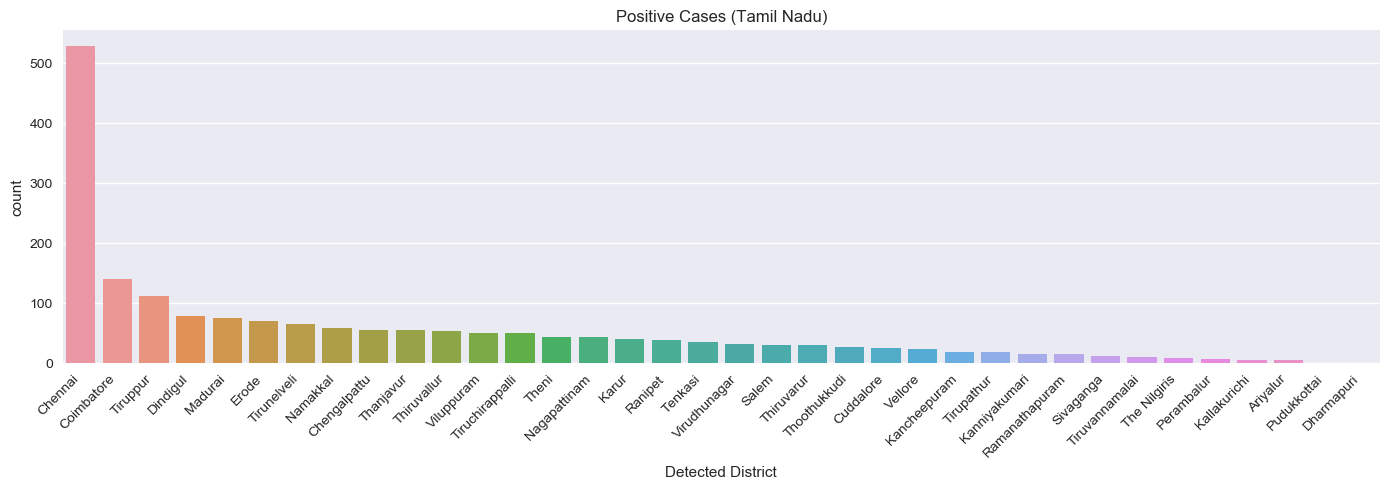

In [5]:
tn_df = df[df['Detected State'] == 'Tamil Nadu']

plt.figure(figsize=(14, 5), dpi=100)

districtwise_count = sns.countplot(data=tn_df, x=tn_df['Detected District'], order=tn_df['Detected District'].value_counts().index)
districtwise_count.set_title('Positive Cases (Tamil Nadu)')

districtwise_count.set_xticklabels(districtwise_count.get_xticklabels(),
                                   rotation=45,
                                   horizontalalignment='right',
                                   fontweight='light')

plt.savefig('data_insight\\cases_tn.png')
plt.show()

### Time Series Data

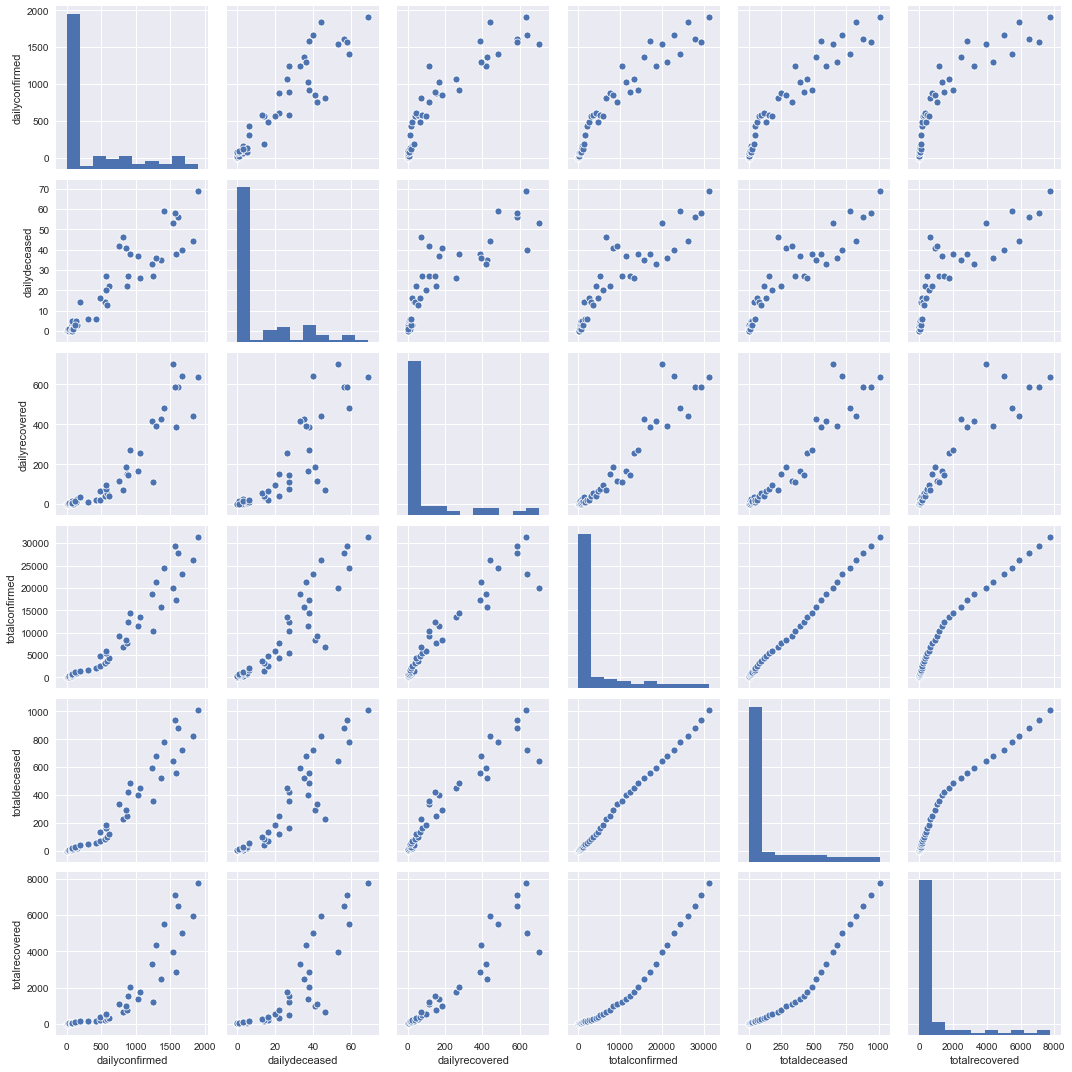

In [6]:
with open('data\\time_series.json') as f:
    data = json.load(f)

total_df = pd.DataFrame(data['cases_time_series'])

cols_to_numeric = [
    'dailyconfirmed',
    'dailydeceased',
    'dailyrecovered',
    'totalconfirmed',
    'totaldeceased',
    'totalrecovered',
]

total_df[cols_to_numeric] = total_df[cols_to_numeric].apply(pd.to_numeric)

sns.pairplot(total_df)
plt.savefig('data_insight\\correlation.png')
plt.show()

### Tamil Nadu Data Analysis

In [7]:
with open('data\\states_daily.json') as f:
    data = json.load(f)

state_df = pd.DataFrame(data['states_daily'])
state_df = state_df[['date', 'status', 'tn']]

state_df['date'] = pd.to_datetime(state_df['date'], infer_datetime_format=True)
state_df['tn'] = pd.to_numeric(state_df['tn'])

confirmed_data = {}
recovered_data = {}
deceased_data = {}

for i in range(len(state_df))[0::3]:
    row = state_df.iloc[i]
    date = row[0]
    status = row[1]
    count = row[2]

    confirmed_data[date] = count

for i in range(len(state_df))[1::3]:
    row = state_df.iloc[i]
    date = row[0]
    status = row[1]
    count = row[2]

    recovered_data[date] = count

for i in range(len(state_df))[2::3]:
    row = state_df.iloc[i]
    date = row[0]
    status = row[1]
    count = row[2]

    deceased_data[date] = count

confirmed_df = pd.DataFrame.from_dict(confirmed_data, orient='index', columns=['confirmed'])
recovered_df = pd.DataFrame.from_dict(recovered_data, orient='index', columns=['recovered'])
deceased_df = pd.DataFrame.from_dict(deceased_data, orient='index', columns=['deceased'])

total_tn_df = confirmed_df.merge(recovered_df, left_index=True, right_index=True).merge(deceased_df, left_index=True, right_index=True)

### Tamil Nadu Data Plotting

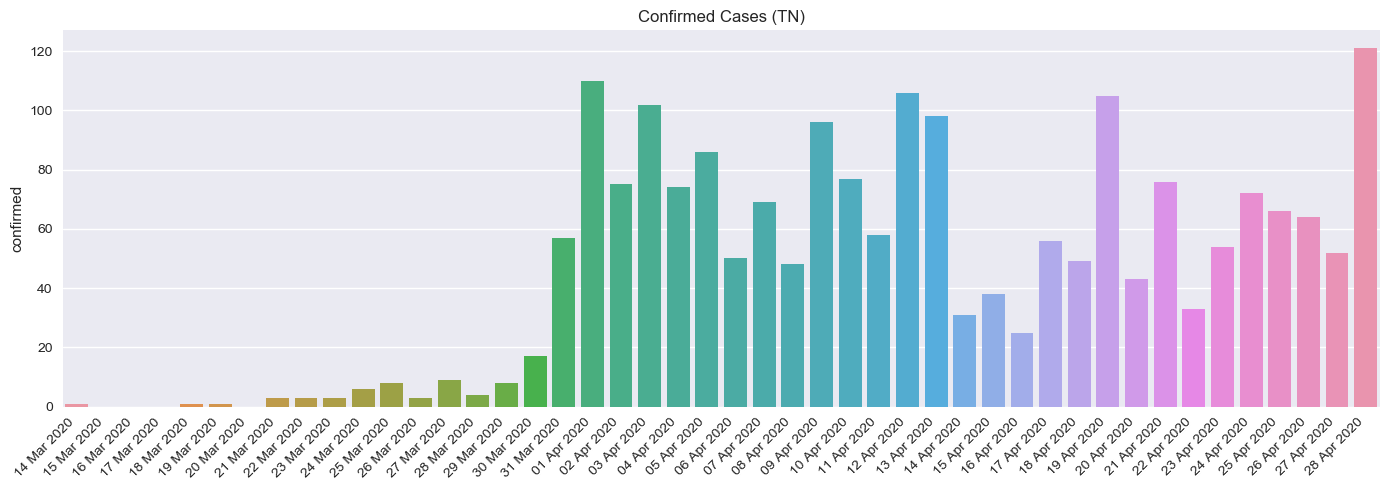

In [8]:
plt.figure(figsize=(14, 5), dpi=100)

fig = sns.barplot(total_tn_df.index, total_tn_df['confirmed'])

fig.set_title('Confirmed Cases (TN)')

fig.set_xticklabels(fig.get_xticklabels(),
                    rotation=45,
                    horizontalalignment='right',
                    fontweight='light')
                    
plt.gca().xaxis.set_major_formatter(plt.FixedFormatter(total_tn_df.index.to_series().dt.strftime('%d %b %Y')))

plt.savefig('data_insight\\daily_confirmed_tn.png')
plt.show()

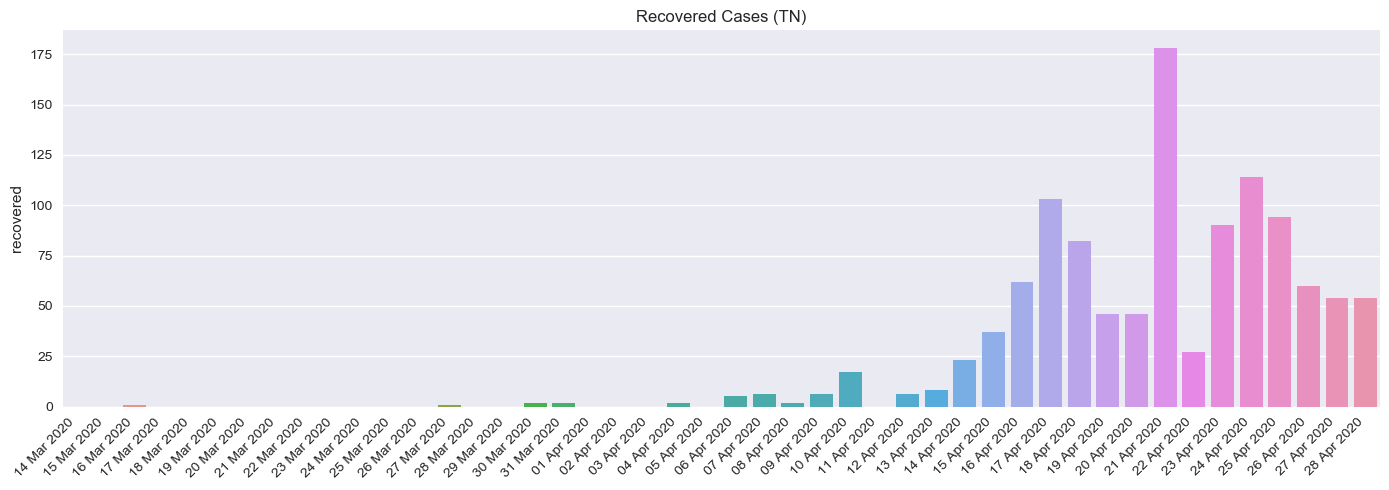

In [9]:
plt.figure(figsize=(14, 5), dpi=100)

fig = sns.barplot(total_tn_df.index, total_tn_df['recovered'])

fig.set_title('Recovered Cases (TN)')

fig.set_xticklabels(fig.get_xticklabels(),
                    rotation=45,
                    horizontalalignment='right',
                    fontweight='light')

plt.gca().xaxis.set_major_formatter(plt.FixedFormatter(total_tn_df.index.to_series().dt.strftime('%d %b %Y')))

plt.savefig('data_insight\\daily_recovered_tn.png')
plt.show()

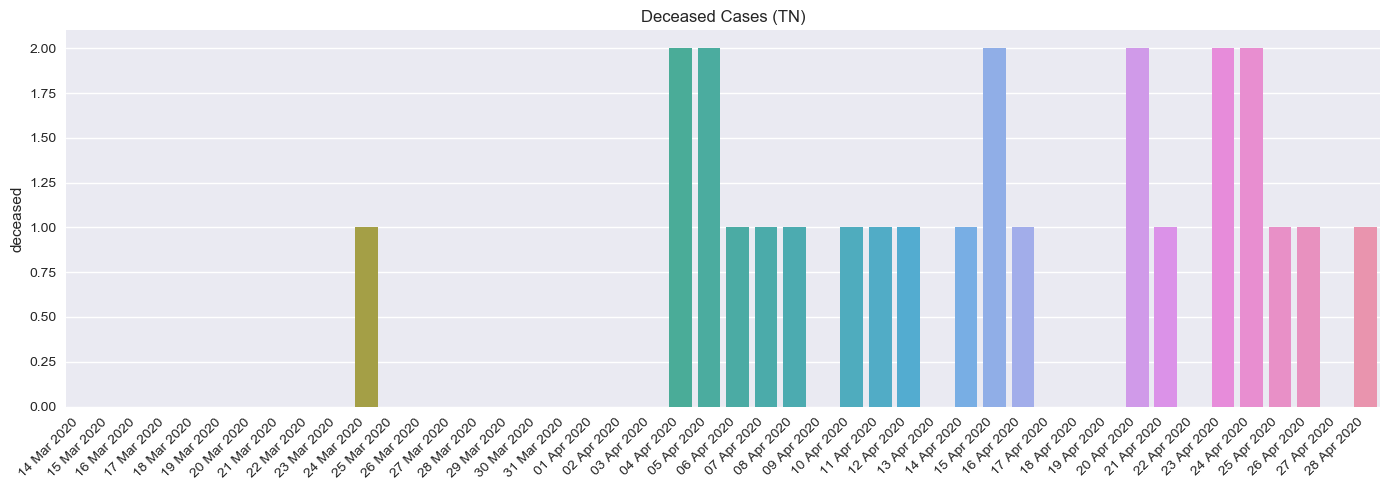

In [10]:
plt.figure(figsize=(14, 5), dpi=100)

fig = sns.barplot(total_tn_df.index, total_tn_df['deceased'])

fig.set_title('Deceased Cases (TN)')

fig.set_xticklabels(fig.get_xticklabels(),
                    rotation=45,
                    horizontalalignment='right',
                    fontweight='light')

plt.gca().xaxis.set_major_formatter(plt.FixedFormatter(total_tn_df.index.to_series().dt.strftime('%d %b %Y')))

plt.savefig('data_insight\\daily_deceased_tn.png')
plt.show()

### Cummulative Data

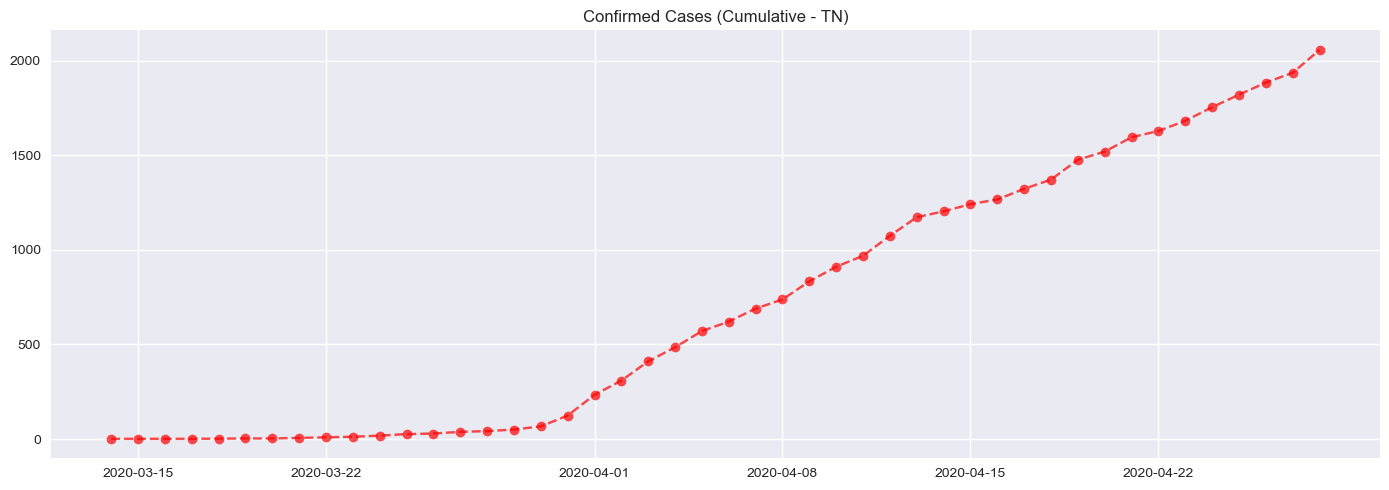

In [11]:
cum_df = total_tn_df.cumsum()

plt.figure(figsize=(14, 5), dpi=100)
plt.plot(cum_df.index, cum_df['confirmed'], '--o', color='r', alpha=0.7)
plt.title('Confirmed Cases (Cumulative - TN)')
plt.savefig('data_insight\\cumulative_confirmed.png')
plt.show()

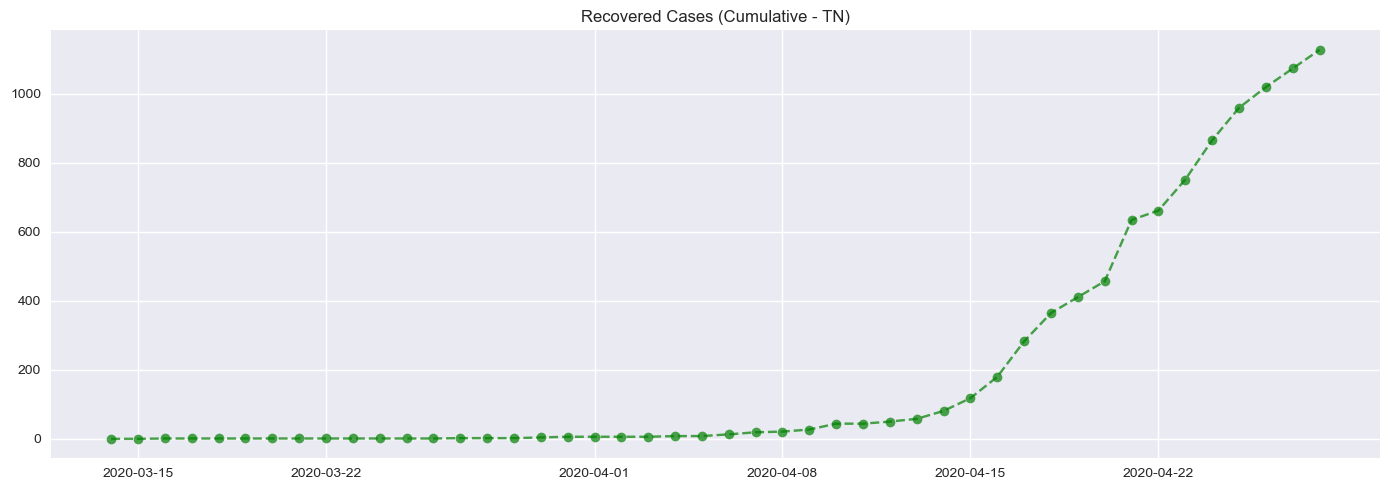

In [12]:
plt.figure(figsize=(14, 5), dpi=100)
plt.plot(cum_df.index, cum_df['recovered'], '--o', color='g', alpha=0.7)
plt.title('Recovered Cases (Cumulative - TN)')
plt.savefig('data_insight\\cumulative_recovered.png')
plt.show()

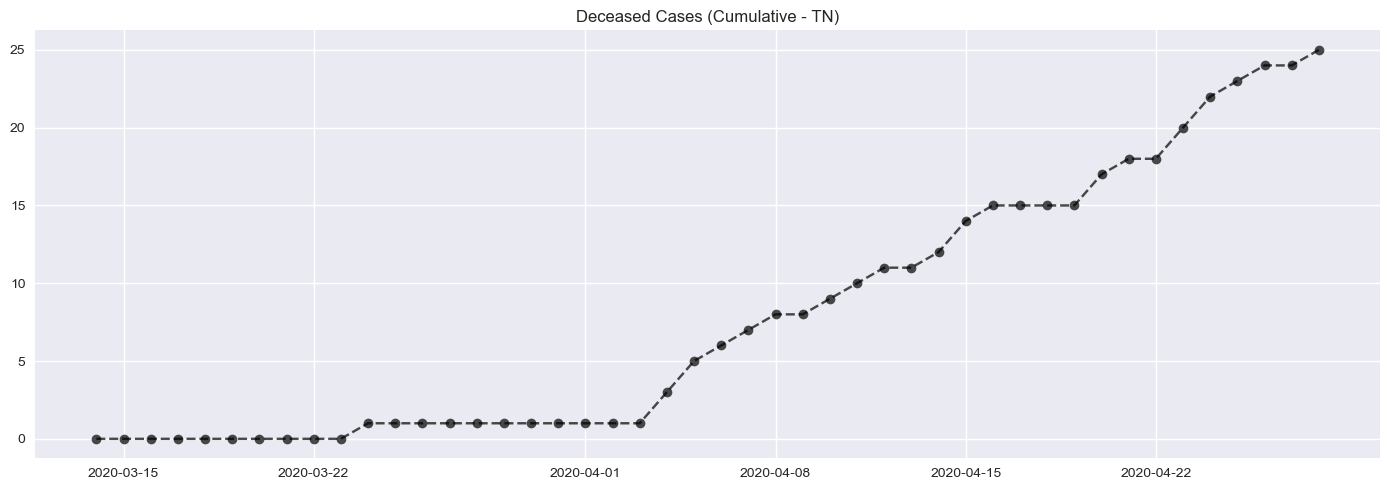

In [13]:
plt.figure(figsize=(14, 5), dpi=100)
plt.plot(cum_df.index, cum_df['deceased'], '--o', color='k', alpha=0.7)
plt.title('Deceased Cases (Cumulative - TN)')
plt.savefig('data_insight\\cumulative_deceased.png')
plt.show()

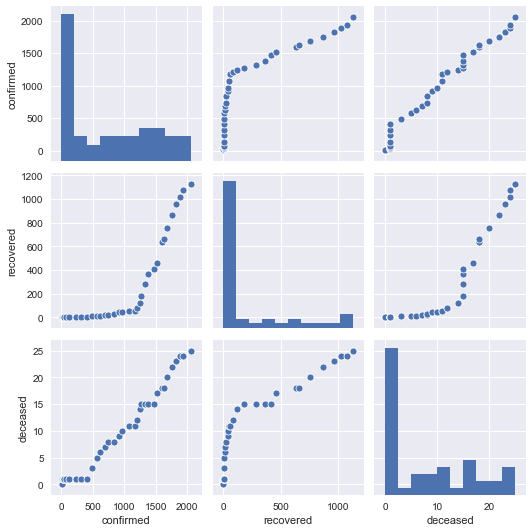

In [14]:
sns.pairplot(cum_df)
plt.savefig('data_insight\\correlation_cumulative_tn.png')
plt.show()